In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import scanpy as sc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

sc.settings.verbosity = 3

In [2]:
data = sc.read_loom('../All_Cells.loom')
data = [~data.obs.Tissue.isin(['Unknown', 'Unannotated'])]
df = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
df = df[(df.padj_50 < 0.05) & (df.padj_58 < 0.05)] # keep dually sig genes only

In [3]:
pos_signature = df[(df.log2FoldChange_58 > 0)].index.values
neg_signature = df[(df.log2FoldChange_58 < 0)].index.values
random = df.sample(np.max([len(pos_signature), len(neg_signature)]), replace=False).index.values
print(len(pos_signature), len(neg_signature))

145 204


In [4]:
data.obs.Tissue = data.obs.Tissue.str.replace('_', '-')

In [5]:
n = 3
sc.tl.score_genes(data, pos_signature, score_name='PosAscrScore')
sc.tl.score_genes(data, neg_signature, score_name='NegAscrScore')
sc.tl.score_genes(data, random, score_name='RandomScore')

computing score 'PosAscrScore'
    finished: added
    'PosAscrScore', score of gene set (adata.obs).
    1041 total control genes are used. (0:00:00)
computing score 'NegAscrScore'
    finished: added
    'NegAscrScore', score of gene set (adata.obs).
    1036 total control genes are used. (0:00:00)
computing score 'RandomScore'
    finished: added
    'RandomScore', score of gene set (adata.obs).
    992 total control genes are used. (0:00:00)


Tissue
Unannotated        0.175910
Pharynx            0.213054
Neuron             0.270620
Unknown            0.323053
Glia               0.370603
Excretory          0.384899
Reproductive       0.452458
Muscle-mesoderm    0.476633
Hypodermis         0.682535
Rectal-cells       0.710616
Intestine          1.000000
Name: PosAscrScore, dtype: float64

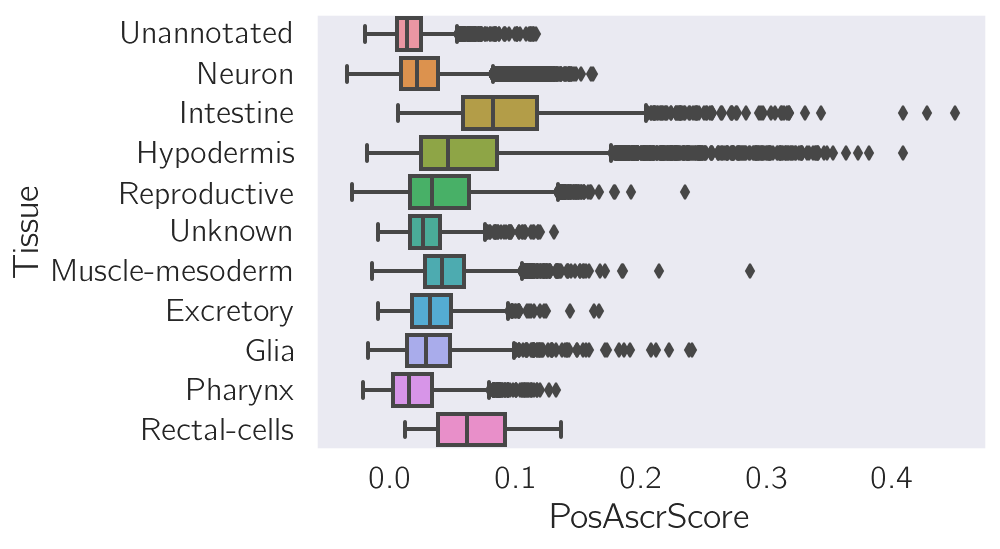

In [6]:
sns.boxplot(y='Tissue', x='PosAscrScore', data=data.obs)
scores = data.obs.groupby('Tissue').PosAscrScore.apply(np.mean)
scores = scores / scores.max()
scores.sort_values()

Tissue
Muscle-mesoderm   -0.113537
Rectal-cells      -0.031641
Excretory          0.008412
Reproductive       0.027512
Intestine          0.064170
Neuron             0.065740
Pharynx            0.079840
Unknown            0.088288
Glia               0.093932
Unannotated        0.121754
Hypodermis         1.000000
Name: NegAscrScore, dtype: float64

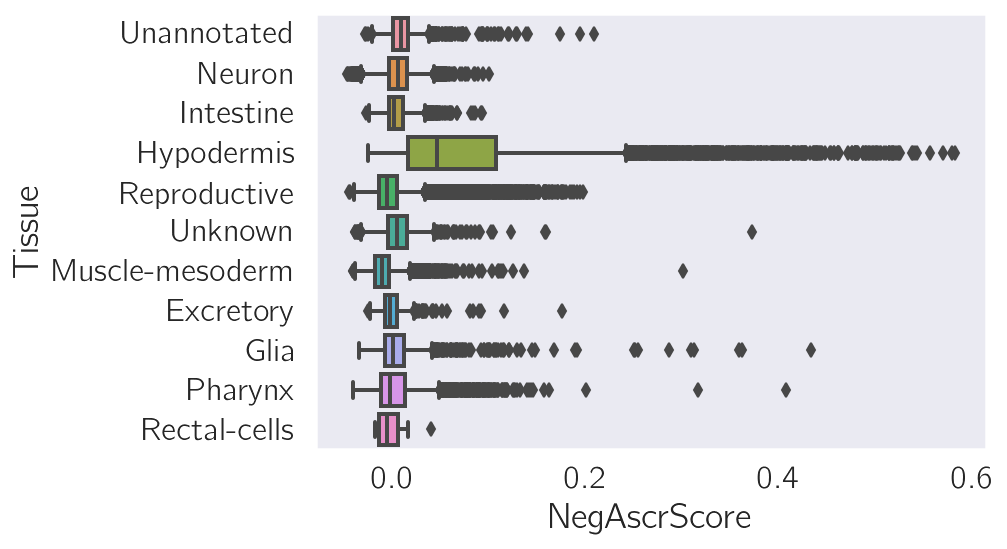

In [7]:
sns.boxplot(y='Tissue', x='NegAscrScore', data=data.obs)
neg_scores = data.obs.groupby('Tissue').NegAscrScore.apply(np.mean)
neg_scores = neg_scores / neg_scores.max()
neg_scores.sort_values()

<AxesSubplot:xlabel='RandomScore', ylabel='Tissue'>

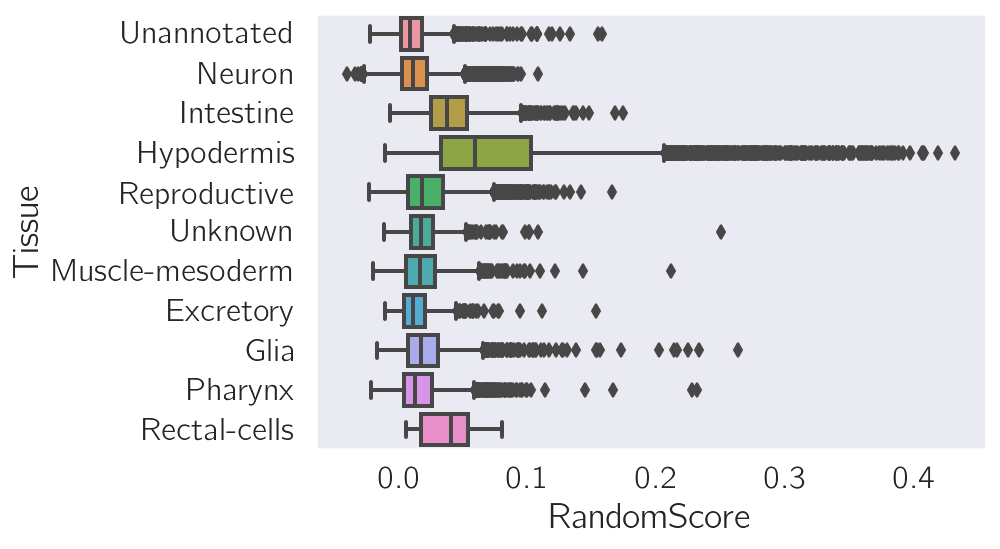

In [8]:
sns.boxplot(y='Tissue', x='RandomScore', data=data.obs)

In [9]:
rscores = data.obs.groupby('Tissue').RandomScore.apply(np.mean)
rscores = rscores / rscores.max()
rscores.sort_values()

Tissue
Unannotated        0.141342
Neuron             0.165921
Excretory          0.179845
Pharynx            0.217617
Muscle-mesoderm    0.221390
Unknown            0.245523
Reproductive       0.282738
Glia               0.284769
Rectal-cells       0.483078
Intestine          0.530449
Hypodermis         1.000000
Name: RandomScore, dtype: float64

In [34]:
data.obs['Celltype'] = data.obs['Cell.type'].str.replace('_', '-')
scores = data.obs.groupby('Celltype').PosAscrScore.apply(np.mean)
scores = scores #/ scores.max()
scores.sort_values()[-10:]

Celltype
RIV-stressed       0.055869
SMD-stressed       0.057208
Vulval-muscle      0.058159
Anal-muscle        0.064733
Rectal-gland       0.066153
Epidermis          0.067131
Spermatheca        0.068274
Distal-tip-cell    0.078378
Intestine          0.093092
Vulval-cells       0.099211
Name: PosAscrScore, dtype: float64

In [33]:
scores = data.obs.groupby('Celltype').NegAscrScore.apply(np.mean)
scores = scores #/ scores.max()
scores.sort_values()[-10:]

Celltype
VA              0.018703
RME-DV          0.018710
ALN             0.019766
Uterine-cell    0.025144
AMso            0.026305
Vulval-cells    0.040256
Glia-4          0.040901
Sperm           0.059310
Epidermis       0.083149
Seam-cell       0.091154
Name: NegAscrScore, dtype: float64

In [26]:
scores = data.obs.groupby('Celltype').RandomScore.apply(np.mean)
scores = scores #/ scores.max()
scores.sort_values()[-10:]

Celltype
Rectal-gland       0.037978
Intestine          0.041702
Uterine-cell       0.041922
AMso               0.042377
Glia-4             0.044750
Sperm              0.044955
Distal-tip-cell    0.045996
Vulval-cells       0.056622
Epidermis          0.081479
Seam-cell          0.085087
Name: RandomScore, dtype: float64

In [12]:
sc.pp.highly_variable_genes(data)
sc.pp.scale(data)
sc.pp.pca(data)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:09)


In [13]:
sc.pp.neighbors(data)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)


In [14]:
sc.tl.umap(data)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:35)


... storing 'Cell.type' as categorical
... storing 'Detection' as categorical
... storing 'Experiment' as categorical
... storing 'Sample' as categorical
... storing 'Tissue' as categorical
... storing 'UMAP.clusters' as categorical
... storing 'birthtime' as categorical
... storing 'modality' as categorical
... storing 'neurotransmitter' as categorical
... storing 'partition' as categorical
... storing 'Celltype' as categorical


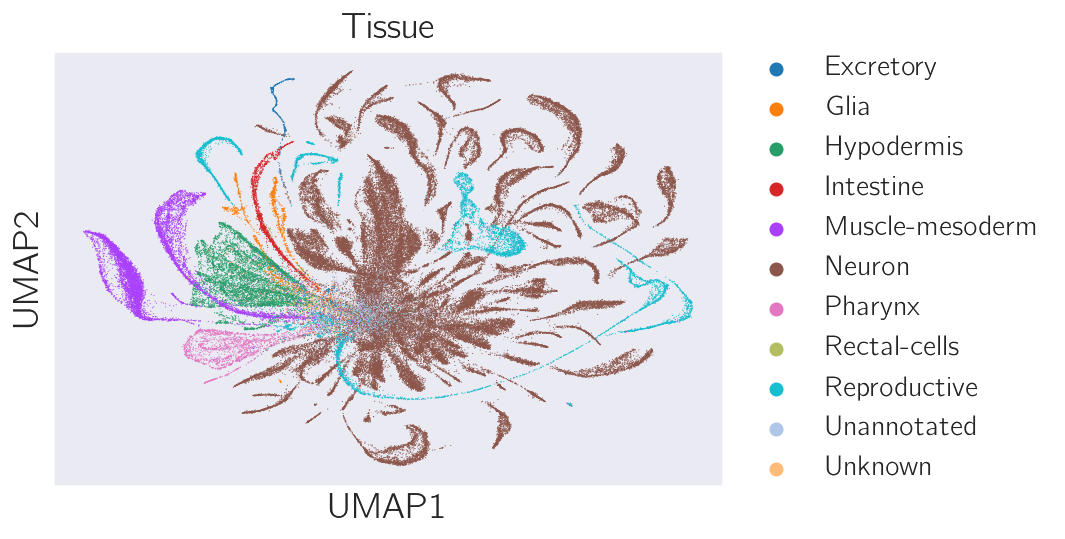

In [15]:
sc.pl.umap(data, color=['Tissue'])

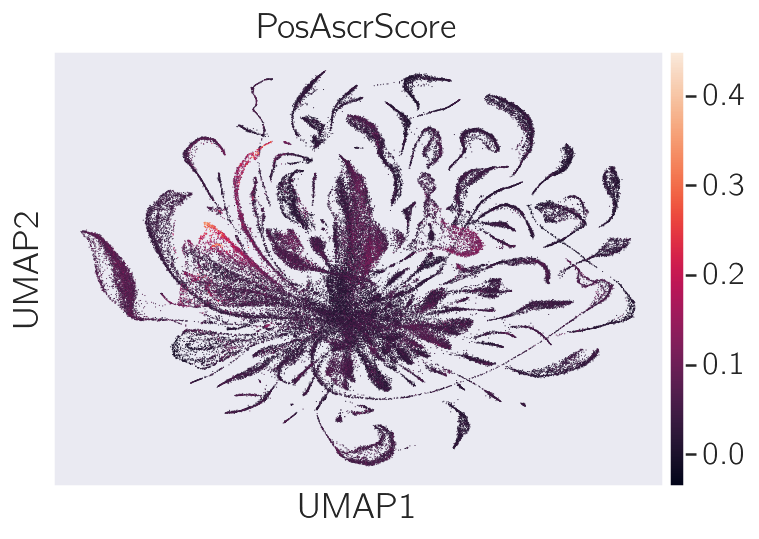

In [16]:
sc.pl.umap(data, color=['PosAscrScore'])#, vmin=-0.3, vmax=0.3)

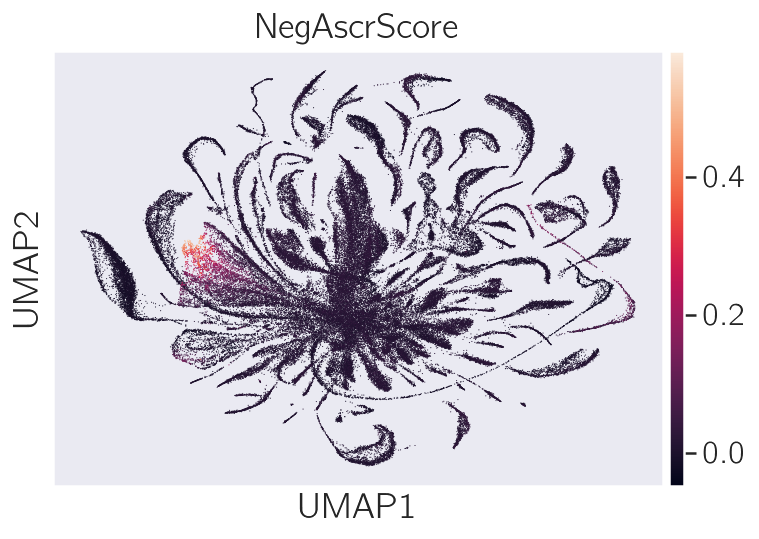

In [17]:
sc.pl.umap(data, color=['NegAscrScore'])#, cmap='seismic', vmin=-0.2, vmax=0.2)

In [83]:
#Define cluster score for all markers
def evaluate_partition(anndata, marker_dict, gene_symbol_key=None, partition_key='louvain_r1'):
    # From https://github.com/theislab/scanpy/issues/290

    # Inputs:
    #    anndata         - An AnnData object containing the data set and a partition
    #    marker_dict     - A dictionary with cell-type markers. The markers should be stores as anndata.var_names or 
    #                      an anndata.var field with the key given by the gene_symbol_key input
    #    gene_symbol_key - The key for the anndata.var field with gene IDs or names that correspond to the marker 
    #                      genes
    #    partition_key   - The key for the anndata.obs field where the cluster IDs are stored. The default is
    #                      'louvain_r1' 

    #Test inputs
    if partition_key not in anndata.obs.columns.values:
        print('KeyError: The partition key was not found in the passed AnnData object.')
        print('   Have you done the clustering? If so, please tell pass the cluster IDs with the AnnData object!')
        raise

    if (gene_symbol_key != None) and (gene_symbol_key not in anndata.var.columns.values):
        print('KeyError: The provided gene symbol key was not found in the passed AnnData object.')
        print('   Check that your cell type markers are given in a format that your anndata object knows!')
        raise
        

    if gene_symbol_key:
        gene_ids = anndata.var[gene_symbol_key]
    else:
        gene_ids = anndata.var_names

    clusters = np.unique(anndata.obs[partition_key])
    n_clust = len(clusters)
    n_groups = len(marker_dict)
    
    marker_res = np.zeros((n_groups, n_clust))
    z_scores = sc.pp.scale(anndata, copy=True)

    i = 0
    for group in marker_dict:
        # Find the corresponding columns and get their mean expression in the cluster
        j = 0
        for clust in clusters:
            cluster_cells = np.in1d(z_scores.obs[partition_key], clust)
            marker_genes = np.in1d(gene_ids, marker_dict[group])
            marker_res[i,j] = z_scores.X[np.ix_(cluster_cells,marker_genes)].mean()
            j += 1
        i+=1

    variances = np.nanvar(marker_res, axis=0)
    if np.all(np.isnan(variances)):
        print("No variances could be computed, check if your cell markers are in the data set.")
        print("Maybe the cell marker IDs do not correspond to your gene_symbol_key input or the var_names")
        raise

    marker_res_df = pd.DataFrame(marker_res, columns=clusters, index=marker_dict.keys())

    #Return the median of the variances over the clusters
    return([np.median(variances), marker_res_df])


In [109]:
def test_sig(obs_df, partition_key, column):
    marker_dict = {'R' + str(i):
                   df.sample(np.max([len(pos_signature), len(neg_signature)]), replace=False).index.values
                   for i in range(100)
                  }
    
    # draw random:
    medvar, rand_df = evaluate_partition(data, marker_dict, partition_key=partition_key)
    
    # melt:
    melted = rand_df.reset_index().melt(id_vars='index', var_name=partition_key, value_name='MeanZScore')
    melted['geneset'] = 'simulation'
    # calculate statistics:
    random_dist = melted.groupby(partition_key).agg([np.mean, np.std])
    
    # ttests
    ttest = (obs_df.T[column] - random_dist[('MeanZScore', 'mean')]) / random_dist[('MeanZScore', 'std')]
    return ttest

In [107]:
marker_dict = {'Positive': pos_signature, 'Negative': neg_signature}
medvar, celltype_df = evaluate_partition(data, marker_dict, partition_key='Celltype')

In [108]:
marker_dict = {'Positive': pos_signature, 'Negative': neg_signature}
medvar, tissuetype_df = evaluate_partition(data, marker_dict, partition_key='Tissue')

In [110]:
ttest_pos = test_sig(tissuetype_df, 'Tissue', 'Positive')
ttest_pos[ttest_pos > 2]

Excretory          4.189387
Glia               1.021395
Hypodermis        -3.573415
Intestine          8.465856
Muscle-mesoderm    4.325321
Neuron             0.198481
Pharynx           -3.818556
Rectal-cells       4.431149
Reproductive      -0.574426
Unannotated       -8.750251
Unknown           -0.286410
dtype: float64

In [111]:
ttest_neg = test_sig(tissuetype_df, 'Tissue', 'Negative')
ttest_neg[ttest_neg > 2]

Hypodermis     2.527233
Pharynx        2.315719
Unannotated    5.692983
dtype: float64

In [112]:
ttest_pos_cell = test_sig(tissuetype_df, 'Celltype', 'Positive')
ttest_pos_cell[ttest_pos_cell > 2]

Intestine    8.994481
dtype: float64

In [113]:
ttest_neg_cell = test_sig(tissuetype_df, 'Celltype', 'Negative')
ttest_neg_cell[ttest_neg_cell > 2]

Unannotated    3.128187
dtype: float64